In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

# Basic

In [2]:
# generate data
x = np.arange(0,10,0.01)
series1 = pd.Series(np.cos(x))
series2 = pd.Series(np.sin(x))

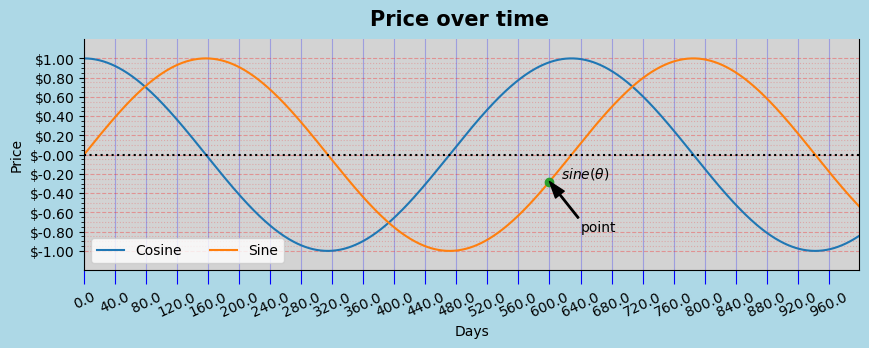

In [3]:
fig, ax = plt.subplots(figsize=(10,3), facecolor="lightblue")
fig.suptitle("Price over time", fontsize=15, fontweight="bold")

ax.plot(series1, label="Cosine")
ax.plot(series2, label="Sine")
ax.axhline(y=0, c="black", ls=":")

ax.set_facecolor("lightgrey")

ax.set_xlabel("Days")
ax.set_ylabel("Price")

ax.legend(ncol=2, loc="lower left")

ax.set_xlim(0, len(series2)-1)
ax.set_ylim(-1.2, 1.2)
ax.set_yscale("linear")

ax.grid(alpha=0.25, which="major", axis="x", c="blue")
ax.grid(alpha=0.3, which="major", axis="y", c="red", ls="--")
ax.grid(alpha=0.2, which="minor", axis="y", c="red", ls="dotted")

# manually set and format y-ticks 
ax.set_yticks(ticks=np.arange(-1,1.2,0.2), 
              labels=["${:,.2f}".format(i) for i in np.arange(-1,1.2,0.2)])
ax.set_yticks(ticks=np.arange(-1,1.05,0.05), minor=True)

# automatically set and format x-ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(40))
# ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=20))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))

ax.tick_params(axis="x", which="major", color="blue", length=10, rotation=25)

ax.spines["top"].set_visible(False)

# text beside a point
ax.plot(600, series2[600], marker="o")
ax.text(615, series2[600], r'$sine(\theta)$', 
        verticalalignment="bottom", horizontalalignment="left", fontsize=10)

# annotate with arrow
ax.annotate("point", xy=(600, series2[600]), xytext=(640, -0.8), 
            arrowprops=dict(facecolor="black", width=1, headwidth=8))

plt.show()

# Date Tickers

In [4]:
# generate data
series = np.cos(np.arange(0,10,0.01))
dates = pd.date_range(start="2019-09-14", freq="M", periods=len(series))
series = pd.Series(series, index=dates)

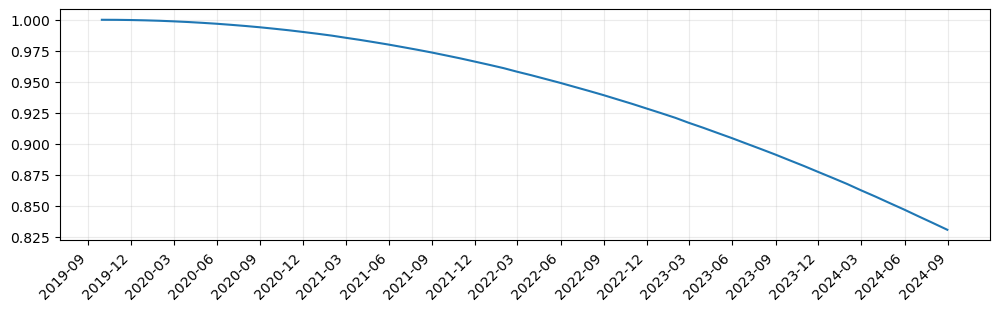

In [5]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(series.iloc[:60])
ax.grid(alpha=0.25)

locator = mdates.MonthLocator(bymonth=(3,6,9,12))
formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_locator(locator)

ax.tick_params(axis="x", rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha="right")

plt.show()

# Dual Axes

In [6]:
# generate data
x = np.arange(0,5,0.5)
series1 = pd.Series(np.cos(x))
series2 = pd.Series(np.sin(x) * 3 + 10)

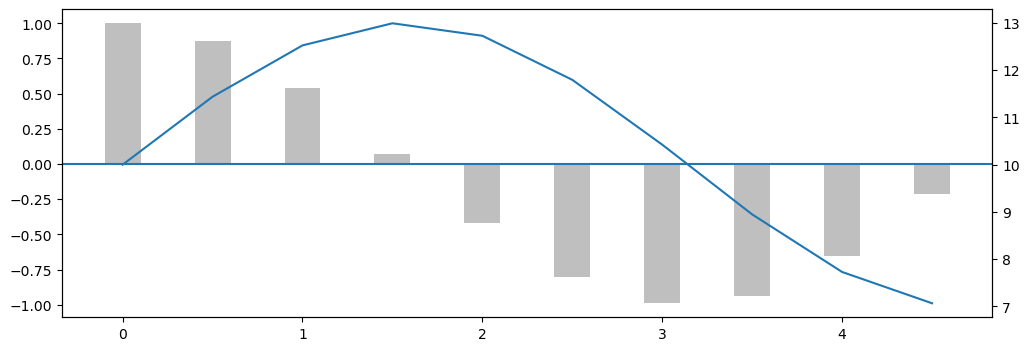

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
ax2 = ax.twinx()
ax.axhline(y=0)
ax.bar(x=x, height=series1, color="grey", alpha=0.5, width=0.2)
ax2.plot(x, series2)
plt.show()

# Multiple Panels

In [8]:
# generate data
series_a = np.arange(0,10,0.01)
series_b = np.sin(series_a)
series_c = np.random.normal(size=len(series_a))
series_d = series_a + series_b + series_c
data_df = pd.DataFrame({"timeseries": series_d, "trend": series_a, 
                        "periodic": series_b, "noise": series_c})

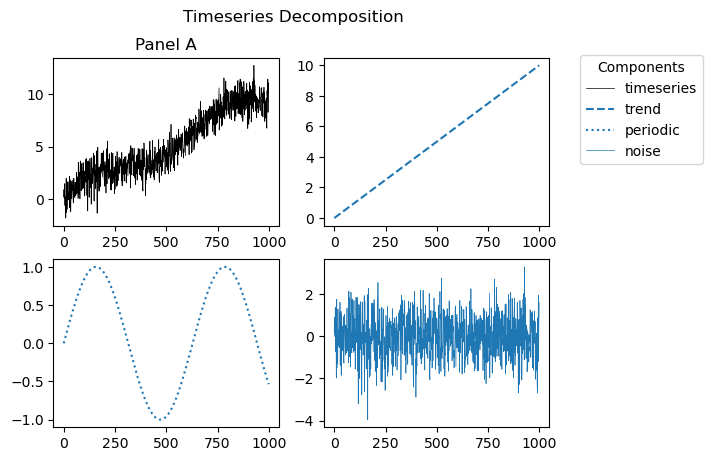

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.suptitle("Timeseries Decomposition")

ax[0,0].plot(data_df["timeseries"], label="timeseries", c="black", ls="-", lw=0.5)
ax[0,0].set_title("Panel A")

ax[0,1].plot(data_df["trend"], label="trend", ls="--")
ax[1,0].plot(data_df["periodic"], label="periodic", ls="dotted")
ax[1,1].plot(data_df["noise"], label="noise", lw=0.5)

# ===== share legend =====
lines, labels = [], []

for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    lines.extend(Line)
    labels.extend(Label)
    
fig.legend(lines, labels, bbox_to_anchor=(1.15, 0.9), title="Components")

plt.show()

# Stacked Bar Chart

In [10]:
classes = ["A", "B", "C", "D"]
data_a = np.array([3, 1, 5, 2])
data_b = np.array([4, 4, 2, 3])
data_c = np.array([1, 1, 5, 5])

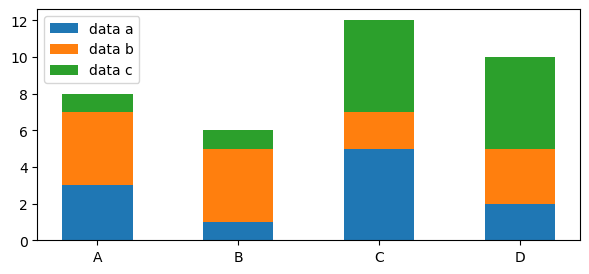

In [11]:
fig, ax = plt.subplots(figsize=(7,3))
ax.bar(x=classes, height=data_a, label="data a", width=0.5)
ax.bar(x=classes, height=data_b, bottom=data_a, label="data b", width=0.5)
ax.bar(x=classes, height=data_c, bottom=data_a + data_b, label="data c", width=0.5)
ax.legend()

# Fill Between

In [12]:
series = np.array([1,2,1,5,3])
low = series - 0.3
upp = series + 0.3

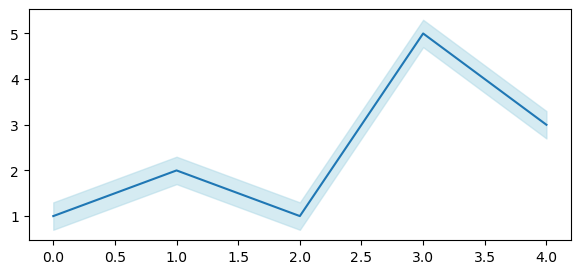

In [13]:
plt.figure(figsize=(7,3))
plt.plot(series)
plt.fill_between(x=np.arange(5), y1=low, y2=upp, alpha=0.5, color="lightblue")